In [16]:
import os
import pandas as pd
import pandas as pd
import seaborn as sns
# Define the directory where your CSV files are stored
csv_dir = "../local/21_10/results"


In [13]:
import os
import glob

# Path to the directory containing the files
file_path = '../local/8_11/'

# Pattern to match all csv files
pattern = os.path.join(file_path, "*.csv")

# List to hold dataframes
dataframes = []

# Iterate over files that match the csv pattern
for file in glob.glob(pattern):
    # Extract task name, model name, and subject name from the file name
    filename = os.path.basename(file)

    if len(filename.split("_")) == 3:
        task_name, model_name, subject_name = filename.split("_")
    else:
        task_name, _, model_name, subject_name = filename.split("_")
    
    subject_name = subject_name.split('.')[0]  # Remove the file extension
    
    # Load the CSV file
    df = pd.read_csv(file)
    
    # Filter columns that contain "mean"
    mean_columns = [col for col in df.columns if 'mean' in col]
    df = df[mean_columns]
    
    # Add task, model, and subject as columns to the dataframe
    df['Task'] = task_name
    df['Model'] = model_name
    df['Subject'] = subject_name
    
    # Append to the list of dataframes
    dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_data = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined dataframe
combined_data


,mean_test/acc,mean_test/f1,mean_val/acc,mean_val/f1,Task,Model,Subject
0,0.408696,0.378475,0.381558,0.347699,2D,csp-MNE,S38
1,0.532787,0.520908,0.504637,0.494590,2D,csp-MNE,S39
2,0.326531,0.313411,0.334965,0.319478,2D,csp-MNE,S51
3,0.694286,0.701316,0.623729,0.621799,2D,csp-MNE,S52
4,0.452252,0.423752,0.352788,0.335452,2D,csp-MNE,S57
5,0.723913,0.724254,0.813281,0.812171,2D,riemann,S38
6,0.604918,0.605003,0.715363,0.713101,2D,riemann,S39
7,0.580612,0.581007,0.703009,0.699079,2D,riemann,S51
8,0.827143,0.827380,0.832203,0.831923,2D,riemann,S52
9,0.578378,0.578333,0.701111,0.699995,2D,riemann,S57


In [21]:
# Separate the data by task
df_2d = combined_data[combined_data['Task'] == '2D']
df_lr = combined_data[combined_data['Task'] == 'LR']

In [22]:
df_2d

,mean_test/acc,mean_test/f1,mean_val/acc,mean_val/f1,Task,Model,Subject
0,0.408696,0.378475,0.381558,0.347699,2D,csp-MNE,S38
1,0.532787,0.520908,0.504637,0.494590,2D,csp-MNE,S39
2,0.326531,0.313411,0.334965,0.319478,2D,csp-MNE,S51
3,0.694286,0.701316,0.623729,0.621799,2D,csp-MNE,S52
4,0.452252,0.423752,0.352788,0.335452,2D,csp-MNE,S57
5,0.723913,0.724254,0.813281,0.812171,2D,riemann,S38
6,0.604918,0.605003,0.715363,0.713101,2D,riemann,S39
7,0.580612,0.581007,0.703009,0.699079,2D,riemann,S51
8,0.827143,0.827380,0.832203,0.831923,2D,riemann,S52
9,0.578378,0.578333,0.701111,0.699995,2D,riemann,S57


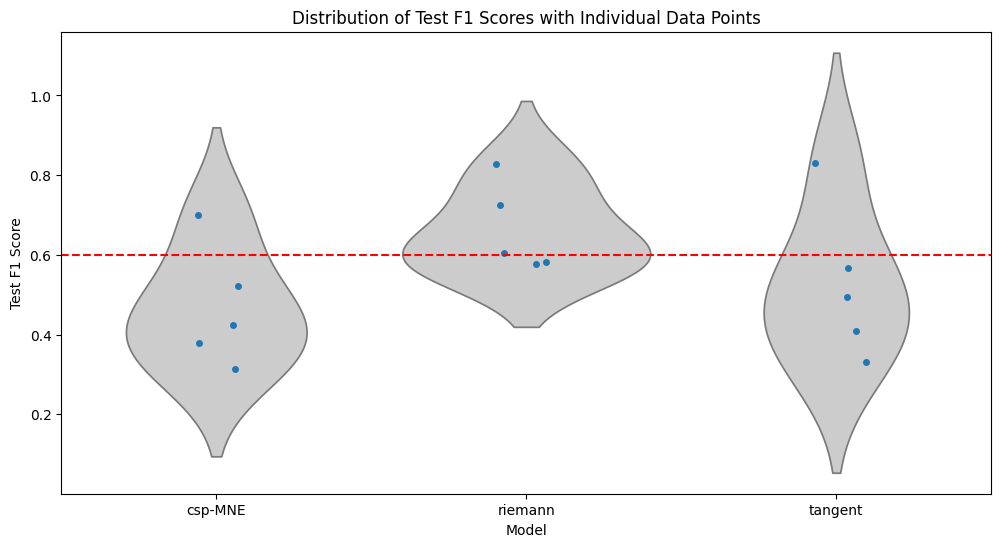

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

threshold_value = 0.6

# Assuming 'df' is your DataFrame and 'mean_test/f1' is the metric of interest
plt.figure(figsize=(12, 6))

# Create the violin plot
sns.violinplot(x='Model', y='mean_test/f1', data=df_2d, inner=None, color=".8")

# Overlay the individual data points
sns.stripplot(x='Model', y='mean_test/f1', data=df_2d, jitter=True, zorder=1)

# Draw a threshold line
plt.axhline(y=threshold_value, color='r', linestyle='--')

plt.title('Distribution of Test F1 Scores with Individual Data Points of 2D Task ')
plt.xlabel('Model')
plt.ylabel('Test F1 Score')
plt.show()


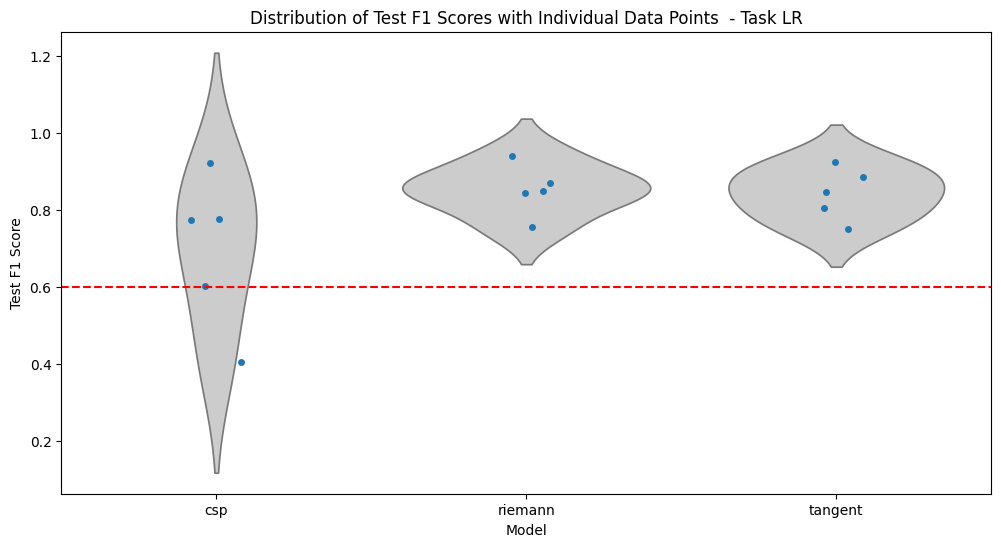

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

threshold_value = 0.6

# Assuming 'df' is your DataFrame and 'mean_test/f1' is the metric of interest
plt.figure(figsize=(12, 6))

# Create the violin plot
sns.violinplot(x='Model', y='mean_test/f1', data=df_lr, inner=None, color=".8")

# Overlay the individual data points
sns.stripplot(x='Model', y='mean_test/f1', data=df_lr, jitter=True, zorder=1)

# Draw a threshold line
plt.axhline(y=threshold_value, color='r', linestyle='--')

plt.title('Distribution of Test F1 Scores with Individual Data Points  - Task LR')
plt.xlabel('Model')
plt.ylabel('Test F1 Score')
plt.show()
